### 1. Introduction

### Goal
The goal of this notebook is to perform regression analysis to predict California housing prices based on various features. We will apply different regression models available in scikit-learn, compare their performance, and optimize their hyperparameters.

### Dataset
We will use the **California Housing Prices Dataset**, which includes information about housing features and their respective prices.

**Dataset Link:** [California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices)


### 2. Import Libraries


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 3. Load Data


In [38]:
df = pd.read_csv('../data/california_housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 4. Data Exploration



In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


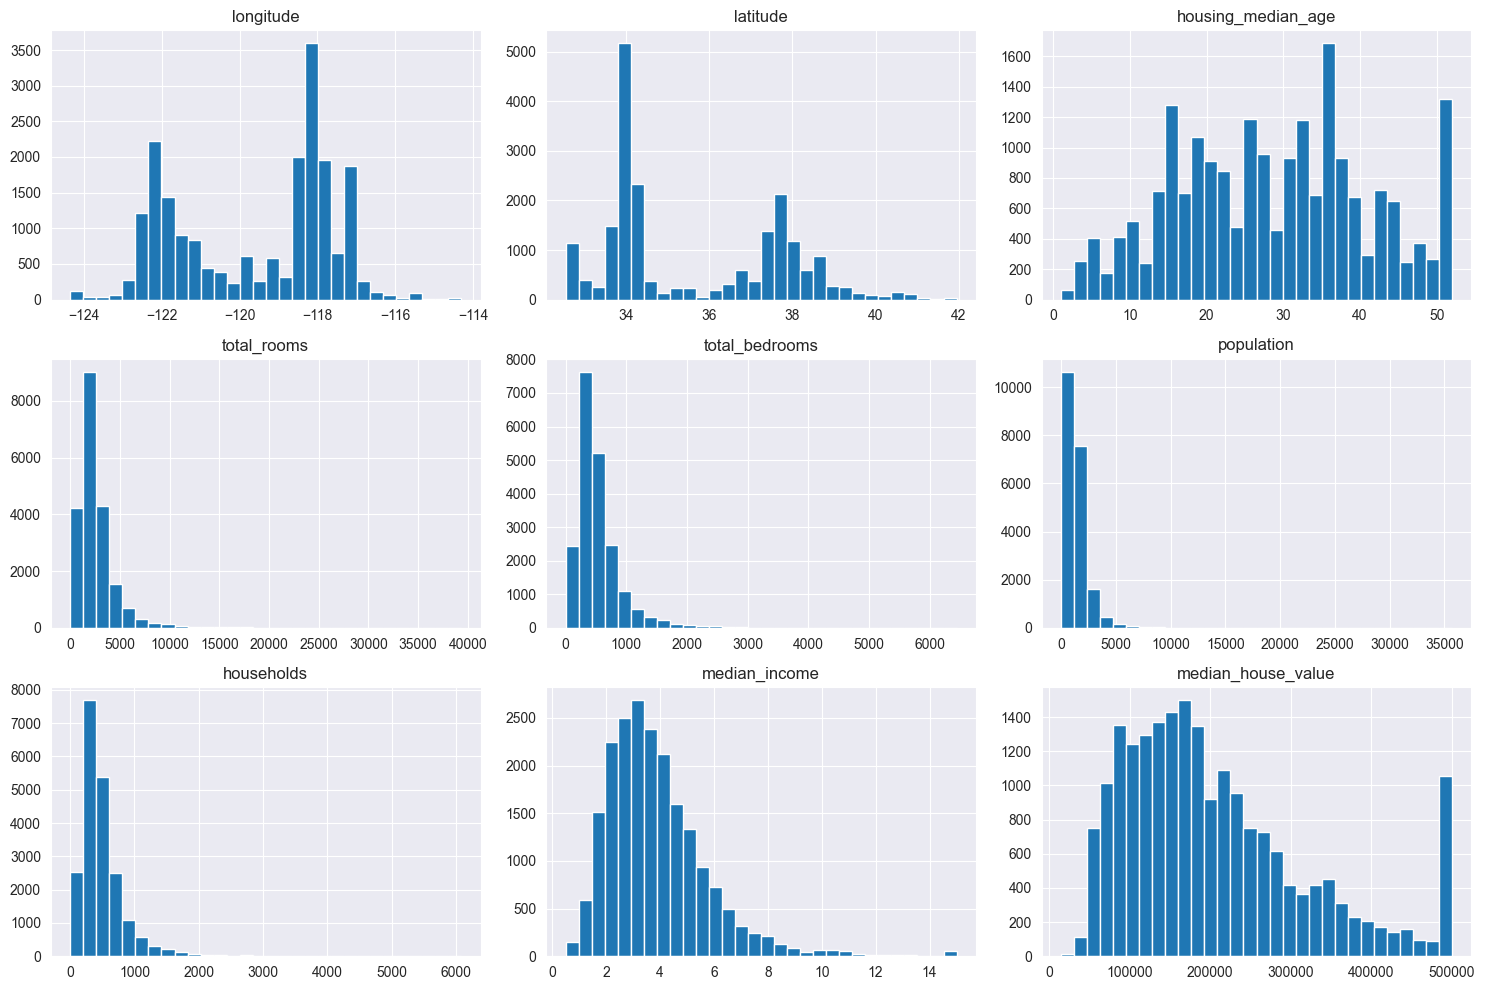

In [42]:
# Plot histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 5. Data Preprocessing

In [43]:
# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Separate numerical and categorical columns
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                      'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

### Build Preprocessing Pipeline
# Imputation for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the entire dataset
X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)



### 6. Model Training


In [44]:
### 6.1 Linear Regression
# Initialize linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

### 6.2 Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

### 6.3 Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

### 6.4 Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

### 6.5 Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

/Users/hubertfijolek/Desktop/Projects/machine-learning-projects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor(random_state=42)

### 7. Model Evaluation


In [47]:
### Evaluation Function

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, mae, r2

### Evaluate All Models

# List of models
models = {
    'Linear Regression': lin_reg,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Decision Tree': tree,
    'Random Forest': forest
}

# Initialize results DataFrame
results = []

# Evaluate models
for name, model in models.items():
    mse, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })
    
results_df = pd.DataFrame(results)

# Display results
results



[{'Model': 'Linear Regression',
  'MSE': 4908476721.156618,
  'RMSE': np.float64(70060.5218447352),
  'MAE': 50670.7382409719,
  'R2': 0.6254240620553604},
 {'Model': 'Ridge Regression',
  'MSE': 4909433339.889235,
  'RMSE': np.float64(70067.3486003947),
  'MAE': 50677.17385203016,
  'R2': 0.6253510605154976},
 {'Model': 'Lasso Regression',
  'MSE': 4908492180.710879,
  'RMSE': np.float64(70060.63217464484),
  'MAE': 50670.85886052531,
  'R2': 0.6254228823050292},
 {'Model': 'Decision Tree',
  'MSE': 4777025130.031977,
  'RMSE': np.float64(69116.02657873192),
  'MAE': 43600.67151162791,
  'R2': 0.6354554029044672},
 {'Model': 'Random Forest',
  'MSE': 2398630785.009868,
  'RMSE': np.float64(48975.818369986104),
  'MAE': 31643.65566860465,
  'R2': 0.8169555593071559}]

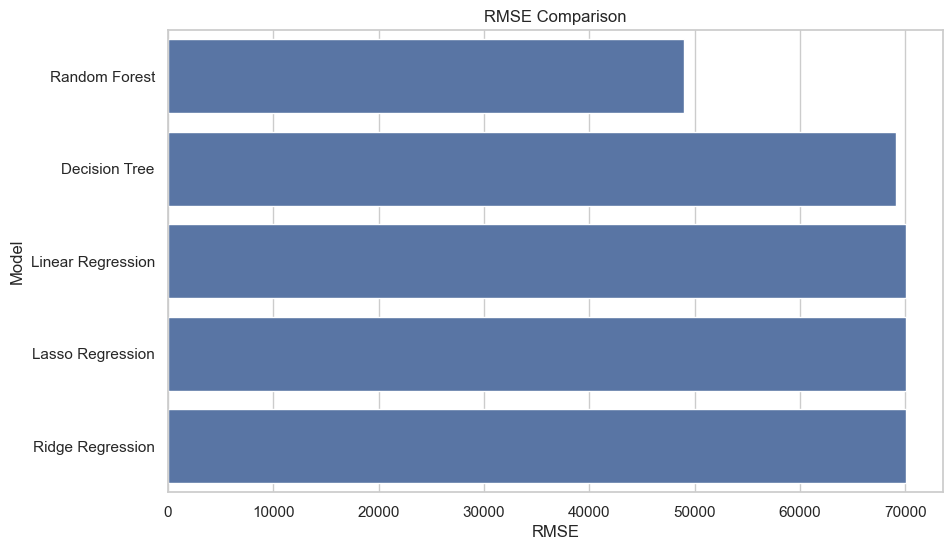

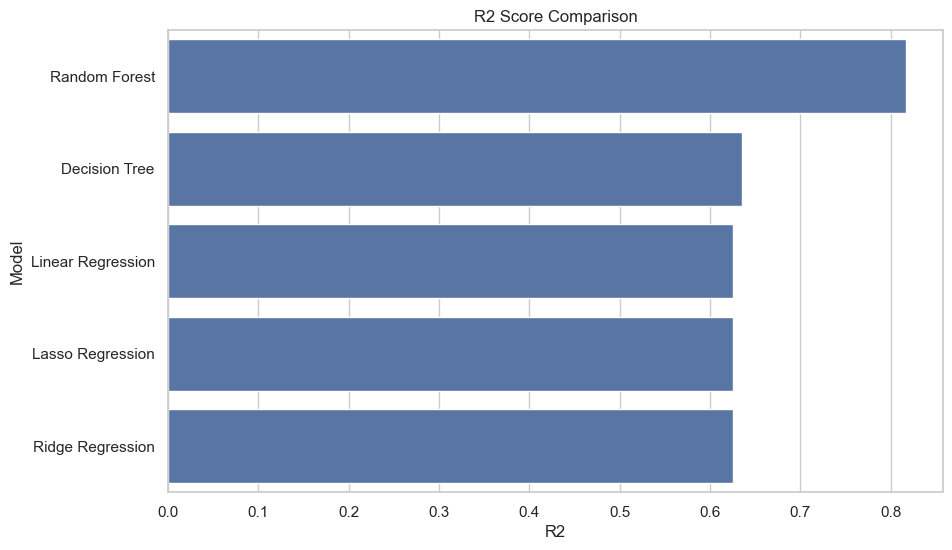

In [49]:
### Visualize Results
# Set style
sns.set(style="whitegrid")

# Visualize RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df.sort_values('RMSE'))
plt.title('RMSE Comparison')
plt.show()

# Visualize R2
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results_df.sort_values('R2', ascending=False))
plt.title('R2 Score Comparison')
plt.show()

### 8. Hyperparameter Optimization


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### GridSearchCV
# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

### Best Parameters and Evaluation

# Display best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate best model
best_rf = grid_search.best_estimator_
mse, rmse, mae, r2 = evaluate_model(best_rf, X_test, y_test)
print(f'Random Forest after optimization:')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
